In [1]:
import os
# change work directory
os.chdir(os.path.dirname(os.getcwd()))


In [15]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
print(os.getcwd())
from src.common.utils import load_model, load_metrics, plot_learning_curve, save_plot, save_model, save_metrics, load_cv_results, format_cv_results, plot_complexity_curve, plot_training_time
from src.common.evaluation import summarize_model, summarize_complexity_curve

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/Placebo/OMSCS/CS7641-ML/MachineLearningProjects/Classification


In [4]:
# Constant variables
input_dir = 'results/dataset1/model_outputs'
output_dir = 'figures/dataset1'

input_dir2 =  'results/dataset1/model_outputs2'
output_dir2 = 'figures/dataset1_2'

input_dir_feature_reduction = 'results/dataset1/model_outputs_feature_reduce'
output_dir_feature_reduction = 'figures/dataset1_feature_reduce'

input_dir_imb = 'results/dataset1/model_outputs_imb'
output_dir_imb = 'figures/dataset1_imb'
name = 'bank_campaign'

if not os.path.exists(output_dir):
    os.makedirs(output_dir, exist_ok=True)
if not os.path.exists(output_dir2):
    os.makedirs(output_dir2, exist_ok=True)
if not os.path.exists(output_dir_feature_reduction):
    os.makedirs(output_dir_feature_reduction, exist_ok=True)
if not os.path.exists(output_dir_imb):
    os.makedirs(output_dir_imb, exist_ok=True)

In [4]:
# def set_plot_style():
#     plt.style.use('default')
#     sns.set_style("whitegrid")
#     plt.rcParams['figure.figsize'] = (10, 8)
#     plt.rcParams['font.size'] = 26
#     plt.rcParams['axes.labelsize'] = 27
#     plt.rcParams['axes.titlesize'] = 29
#     plt.rcParams['xtick.labelsize'] = 240
#     plt.rcParams['ytick.labelsize'] = 24
#     plt.rcParams['legend.fontsize'] = 24
#     plt.rcParams['figure.facecolor'] = 'white'

# set_plot_style()

# KNN

------knn------
Model loaded successfully from results/dataset1/model_outputs/knn_bank_campaign.joblib
Metrics loaded successfully from results/dataset1/model_outputs/knn_bank_campaign_metrics.json
the best model params: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
the metrics of testing dataset: {'accuracy': 0.9058023792182569, 'precision': 0.6037735849056604, 'recall': 0.45266594124047876, 'f1': 0.5174129353233831}
Metrics loaded successfully from results/dataset1/model_outputs/knn_bank_campaign_lc_metrics.json
Plot saved successfully at figures/dataset1/knn_lc_bank_campaign.png
------knn2------
Model loaded successfully from results/dataset1/model_outputs2/knn_bank_campaign.joblib
Metrics loaded successfully from results/dataset1/model_outputs2/knn_bank_campaign_metrics.json
the best model params: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None,

(KNeighborsClassifier(n_neighbors=3),
 {'accuracy': 0.8979121145909201,
  'precision': 0.5644555694618273,
  'recall': 0.4777542372881356,
  'f1': 0.5174985656913368})

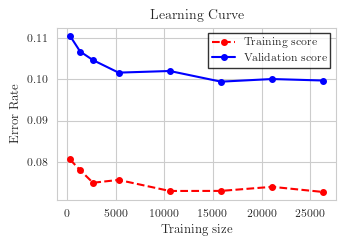

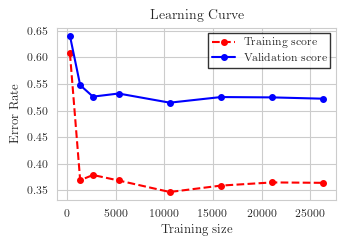

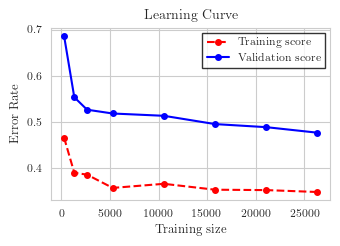

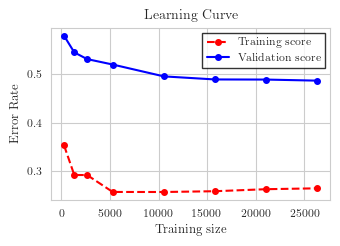

In [6]:
print('------knn------')
summarize_model(input_dir, output_dir, 'knn', name, 'Error Rate')
print('------knn2------')
summarize_model(input_dir2, output_dir2, 'knn', name, 'Error Rate')
print('------knn_feature_reduction------')
summarize_model(input_dir_feature_reduction, output_dir_feature_reduction, 'knn', name, 'Error Rate')
print('------knn_imb------')
summarize_model(input_dir_imb, output_dir_imb, 'knn', name, 'Error Rate')

## Complexity curve

In [16]:
print('============ knn =================')
cv_results = pd.read_csv(f'{input_dir}/knn_cv_results.csv')
print(cv_results.loc[cv_results['mean_test_score'].idxmax()])
print('============ knn2 =================')
cv_results = pd.read_csv(f'{input_dir2}/knn_cv_results.csv')
print(cv_results.loc[cv_results['mean_test_score'].idxmax()])
print('============ knn_feature_reduction =================')
cv_results = pd.read_csv(f'{input_dir_feature_reduction}/knn_cv_results.csv')
print(cv_results.loc[cv_results['mean_test_score'].idxmax()])
print('============ knn_imb =================')
cv_results = pd.read_csv(f'{input_dir_imb}/knn_cv_results.csv')
print(cv_results.loc[cv_results['mean_test_score'].idxmax()])



============ knn =================
n_neighbors          5.000000
mean_fit_time        0.005334
std_fit_time         0.001560
mean_score_time     41.653899
std_score_time      19.724866
mean_test_score      0.483468
std_test_score       0.020215
mean_train_score     0.627504
std_train_score      0.005575
mean_train_error     0.372496
mean_test_error      0.516532
Name: 1, dtype: float64
============ knn2 =================
n_neighbors                 5
weights               uniform
mean_fit_time         0.00713
std_fit_time         0.001452
mean_score_time     37.257725
std_score_time       0.120703
mean_test_score      0.477489
std_test_score       0.009993
mean_train_score     0.635664
std_train_score      0.004577
mean_train_error     0.364336
mean_test_error      0.522511
Name: 0, dtype: object
============ knn_feature_reduction =================
n_neighbors         5.000000
mean_fit_time       0.003246
std_fit_time        0.000781
mean_score_time     0.722969
std_score_time      0.0

========= KNN vs neigbors ==============
n_neighbors          5.000000
mean_fit_time        0.005334
std_fit_time         0.001560
mean_score_time     41.653899
std_score_time      19.724866
mean_test_score      0.483468
std_test_score       0.020215
mean_train_score     0.627504
std_train_score      0.005575
mean_train_error     0.372496
mean_test_error      0.516532
Name: 1, dtype: float64
Plot saved successfully at figures/dataset1/knn_cc_n_neighbors_bank_campaign.png
========= KNN vs weights ==============
n_neighbors                 5
weights               uniform
mean_fit_time         0.00713
std_fit_time         0.001452
mean_score_time     37.257725
std_score_time       0.120703
mean_test_score      0.477489
std_test_score       0.009993
mean_train_score     0.635664
std_train_score      0.004577
mean_train_error     0.364336
mean_test_error      0.522511
Name: 0, dtype: object
Plot saved successfully at figures/dataset1_2/knn_cc_weights_bank_campaign.png


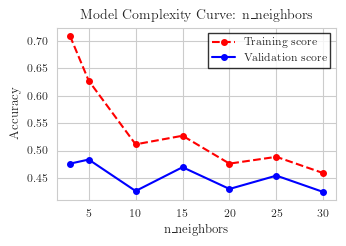

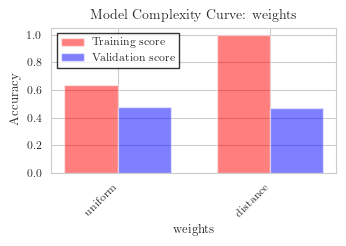

In [18]:
print('========= KNN vs neigbors ==============')
cv_results = pd.read_csv(os.path.join(input_dir, 'knn_cv_results.csv'))
plot, ax = summarize_complexity_curve(cv_results, output_dir, 'knn', name, 'n_neighbors', 'Accuracy')

print('========= KNN vs weights ==============')
cv_results = pd.read_csv(os.path.join(input_dir2, 'knn_cv_results.csv'))
plot, ax = summarize_complexity_curve(cv_results, output_dir2, 'knn', name, 'weights', 'Accuracy')

## Trainig time 

========= KNN vs neigbors ==============
Plot saved successfully at figures/dataset1/knn_training_time_neighbor_bank_campaign.png
========= KNN vs weights ==============
Plot saved successfully at figures/dataset1_2/knn_training_time_weights_bank_campaign.png


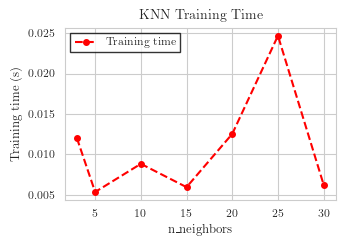

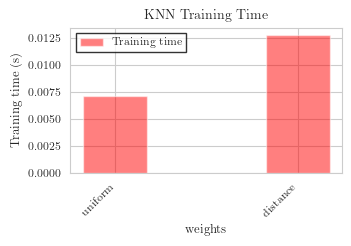

In [21]:
print('========= KNN vs neigbors ==============')
cv_results = pd.read_csv(os.path.join(input_dir, 'knn_cv_results.csv'))
plot, ax = plot_training_time(cv_results, 'n_neighbors', 'KNN Training Time')
save_plot(plot, output_dir, 'knn', 'training_time_neighbor', name)

print('========= KNN vs weights ==============')
cv_results = pd.read_csv(os.path.join(input_dir2, 'knn_cv_results.csv'))
plot, ax = plot_training_time(cv_results, 'weights', 'KNN Training Time')
save_plot(plot, output_dir2, 'knn', 'training_time_weights', name)


# SVM

------svm------
Model loaded successfully from results/dataset1/model_outputs/svm_bank_campaign.joblib
Metrics loaded successfully from results/dataset1/model_outputs/svm_bank_campaign_metrics.json
the best model params: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.1, 'kernel': 'poly', 'max_iter': -1, 'probability': False, 'random_state': 17, 'shrinking': True, 'tol': 0.001, 'verbose': False}
the metrics of testing dataset: {'accuracy': 0.9149065307113377, 'precision': 0.6579710144927536, 'recall': 0.4940152339499456, 'f1': 0.5643256681168427}
Metrics loaded successfully from results/dataset1/model_outputs/svm_bank_campaign_lc_metrics.json
Plot saved successfully at figures/dataset1/svm_lc_bank_campaign.png
------svm_feature_reduction------
Model loaded successfully from results/dataset1/model_outputs_feature_reduce/svm_bank_campaign.joblib
Metrics loaded successfully from results/datase

(SVC(gamma=0.1, random_state=17),
 {'accuracy': 0.9109007040543822,
  'precision': 0.6797945205479452,
  'recall': 0.4205508474576271,
  'f1': 0.5196335078534031})

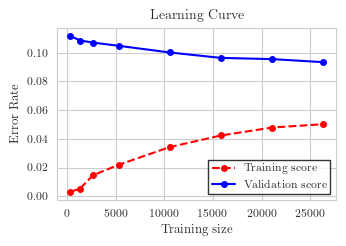

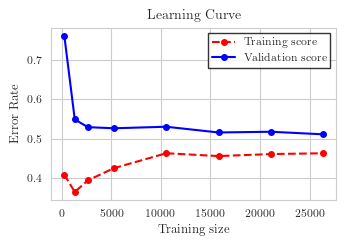

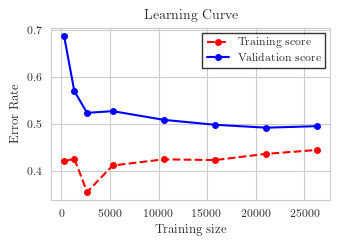

In [8]:
print("------svm------")
summarize_model(input_dir, output_dir, 'svm', name, 'Error Rate')
print("------svm_feature_reduction------")
summarize_model(input_dir_feature_reduction, output_dir_feature_reduction, 'svm', name, 'Error Rate')
print("------svm_imb------")
summarize_model(input_dir_imb, output_dir_imb, 'svm', name, 'Error Rate')

## Complexity curve

In [22]:
print('============ svm =================')
cv_results = pd.read_csv(f'{input_dir}/svm_cv_results.csv')
print(cv_results.loc[cv_results['mean_test_score'].idxmax()])
print('============ svm_feature_reduction =================')
cv_results = pd.read_csv(f'{input_dir_feature_reduction}/svm_cv_results.csv')
print(cv_results.loc[cv_results['mean_test_score'].idxmax()])
print('============ svm_imb =================')
cv_results = pd.read_csv(f'{input_dir_imb}/svm_cv_results.csv')
print(cv_results.loc[cv_results['mean_test_score'].idxmax()])

============ svm =================
gamma                     0.1
kernel                   poly
mean_fit_time       81.307166
std_fit_time         4.518181
mean_score_time      5.938786
std_score_time       0.814687
mean_test_score      0.523032
std_test_score       0.018972
mean_train_score     0.745593
std_train_score      0.003795
mean_train_error     0.254407
mean_test_error      0.476968
Name: 8, dtype: object
============ svm_feature_reduction =================
gamma                    0.1
kernel                   rbf
mean_fit_time       5.493916
std_fit_time         0.06694
mean_score_time     1.700519
std_score_time      0.006464
mean_test_score     0.488872
std_test_score      0.017601
mean_train_score    0.536878
std_train_score     0.004464
mean_train_error    0.463122
mean_test_error     0.511128
Name: 0, dtype: object
============ svm_imb =================
gamma                     0.1
kernel                    rbf
mean_fit_time       14.614828
std_fit_time          2.81861

gamma                     0.1
kernel                    rbf
mean_fit_time       38.702038
std_fit_time         2.308598
mean_score_time      6.257129
std_score_time       0.537877
mean_test_score       0.51217
std_test_score       0.009036
mean_train_score     0.647991
std_train_score      0.004618
mean_train_error     0.352009
mean_test_error       0.48783
Name: 7, dtype: object
Plot saved successfully at figures/dataset1/svm_cc_gamma_bank_campaign.png
Plot saved successfully at figures/dataset1/svm_training_time_gamma_bank_campaign.png
gamma                     0.1
kernel                   poly
mean_fit_time       81.307166
std_fit_time         4.518181
mean_score_time      5.938786
std_score_time       0.814687
mean_test_score      0.523032
std_test_score       0.018972
mean_train_score     0.745593
std_train_score      0.003795
mean_train_error     0.254407
mean_test_error      0.476968
Name: 8, dtype: object
Plot saved successfully at figures/dataset1/svm_cc_kernel_bank_campaign.p

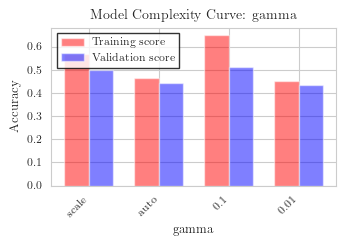

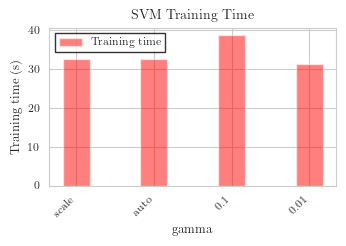

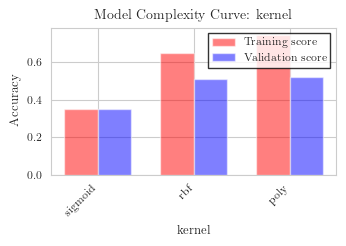

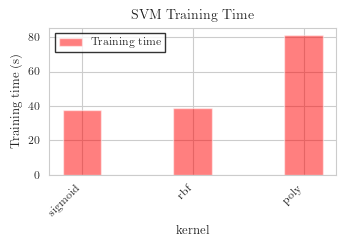

In [27]:
cv_results = pd.read_csv(os.path.join(input_dir, 'svm_cv_results.csv'))
sub_cv_results = cv_results.loc[cv_results['kernel'] == 'rbf']
summarize_complexity_curve(sub_cv_results, output_dir, 'svm', name, 'gamma', 'Accuracy')
plot, ax = plot_training_time(sub_cv_results, 'gamma', 'SVM Training Time')
save_plot(plot, output_dir, 'svm', 'training_time_gamma', name)

sub_cv_results = cv_results.loc[cv_results['gamma'] == '0.1']
summarize_complexity_curve(sub_cv_results, output_dir, 'svm', name, 'kernel', 'Accuracy')
plot, ax = plot_training_time(sub_cv_results, 'kernel', 'SVM Training Time')
save_plot(plot, output_dir, 'svm', 'training_time_kernel', name)

# Neural Network

------- nn ------
Model loaded successfully from results/dataset1/model_outputs/nn_bank_campaign.joblib
Metrics loaded successfully from results/dataset1/model_outputs/nn_bank_campaign_metrics.json
the best model params: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': True, 'epsilon': 1e-08, 'hidden_layer_sizes': [32, 30], 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 17, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
the metrics of testing dataset: {'accuracy': 0.9227967953386744, 'precision': 0.6651108518086347, 'recall': 0.6202393906420022, 'f1': 0.6418918918918919}
Metrics loaded successfully from results/dataset1/model_outputs/nn_bank_campaign_lc_metrics.json
Plot saved successfully at figures/dataset1/n

(MLPClassifier(early_stopping=True, hidden_layer_sizes=[45],
               learning_rate='adaptive', learning_rate_init=0.005,
               random_state=17),
 {'accuracy': 0.9094440398154892,
  'precision': 0.6178571428571429,
  'recall': 0.5497881355932204,
  'f1': 0.5818385650224215})

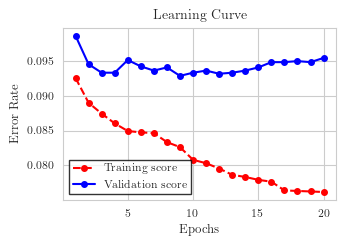

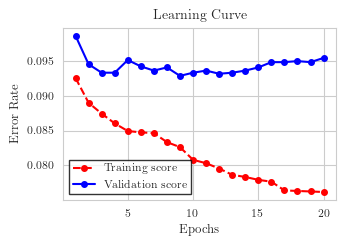

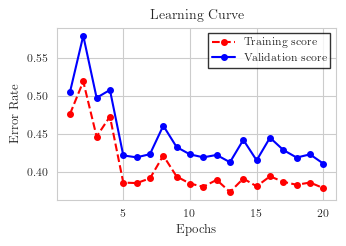

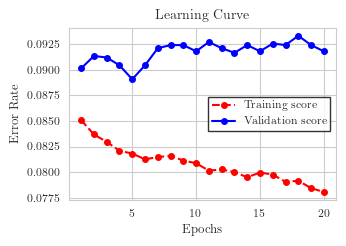

In [32]:
print("------- nn ------")
summarize_model(input_dir, output_dir, 'nn', name, 'Error Rate')
print("------- nn2 ------")
summarize_model(input_dir2, output_dir2, 'nn', name, 'Error Rate')
print("------- nn_feature_reduction ------")
summarize_model(input_dir_feature_reduction, output_dir_feature_reduction, 'nn', name, 'Error Rate')
print("------- nn_imb ------")
summarize_model(input_dir_imb, output_dir_imb, 'nn', name, 'Error Rate')


## Complexity curve

In [33]:
print('======== nn =========')
cv_results =  pd.read_csv(os.path.join(input_dir, 'nn_cv_results.csv'))
print(cv_results.loc[cv_results['mean_test_score'].idxmax()])
print('======== nn2 =========')
cv_results =  pd.read_csv(os.path.join(input_dir2, 'nn_cv_results.csv'))
print(cv_results.loc[cv_results['mean_test_score'].idxmax()])
print('======== nn_feature_reduction =========')
cv_results =  pd.read_csv(os.path.join(input_dir_feature_reduction, 'nn_cv_results.csv'))
print(cv_results.loc[cv_results['mean_test_score'].idxmax()])
print('======== nn_imb =========')
cv_results =  pd.read_csv(os.path.join(input_dir_imb, 'nn_cv_results.csv'))
print(cv_results.loc[cv_results['mean_test_score'].idxmax()])

======== nn =========
hidden_layer_sizes    [32, 30]
mean_fit_time         1.083198
std_fit_time          0.251606
mean_score_time       0.004031
std_score_time        0.000516
mean_test_score       0.567613
std_test_score        0.024115
mean_train_score      0.605786
std_train_score        0.02601
mean_train_error      0.394214
mean_test_error       0.432387
Name: 15, dtype: object
======== nn2 =========
hidden_layer_sizes    [32, 30]
learning_rate         adaptive
learning_rate_init       0.001
mean_fit_time         1.111964
std_fit_time          0.257559
mean_score_time       0.003689
std_score_time        0.000091
mean_test_score       0.567613
std_test_score        0.024115
mean_train_score      0.605786
std_train_score        0.02601
mean_train_error      0.394214
mean_test_error       0.432387
Name: 9, dtype: object
======== nn_feature_reduction =========
hidden_layer_sizes    [32, 25]
learning_rate         adaptive
learning_rate_init        0.05
mean_fit_time         0.608242


==== nn ====
Plot saved successfully at figures/dataset1/nn_hidden_layer_sizes_bank_campaign.png
==== nn ====
Plot saved successfully at figures/dataset1/nn_training_time_hidden_layer_sizes_bank_campaign.png


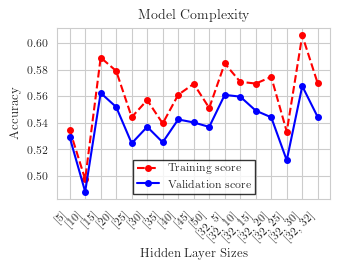

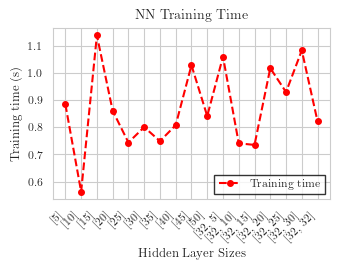

In [39]:
cv_results = pd.read_csv(os.path.join(input_dir, 'nn_cv_results.csv'))
# draw
print('==== nn ====')
# turn the hidden_layer_sizes into number first and second hidden layer size
cv_results['node_size'] = np.arange(1, cv_results.shape[0]+1)
lr_plt, ax= plot_complexity_curve(cv_results, 'node_size','mean_train_score', 'mean_test_score', 'Model Complexity', 'Accuracy')
# set the x ticks
ax.set_xticks(cv_results['node_size'])
ax.set_xticklabels(cv_results['hidden_layer_sizes'], rotation=45, ha='right')
ax.set_xlabel('Hidden Layer Sizes')
# save the plot
save_plot(lr_plt, output_dir, 'nn', 'hidden_layer_sizes', name)

# training time
print('==== nn ====')
plot, ax = plot_training_time(cv_results, 'node_size', 'NN Training Time')
# set the x ticks
ax.set_xticks(cv_results['node_size'])
ax.set_xticklabels(cv_results['hidden_layer_sizes'], rotation=45, ha='right')
ax.set_xlabel('Hidden Layer Sizes')
# save the plot
save_plot(plot, output_dir, 'nn', 'training_time_hidden_layer_sizes', name)

Plot saved successfully at figures/dataset1_2/nn_training_time_learning_rate_init_bank_campaign.png


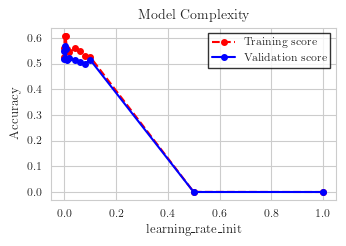

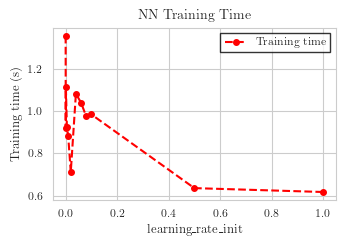

In [40]:
# draw
cv_results = pd.read_csv(os.path.join(input_dir2, 'nn_cv_results.csv'))
plot_complexity_curve(cv_results, 'learning_rate_init','mean_train_score', 'mean_test_score', 'Model Complexity', 'Accuracy')

# training time
plot, ax = plot_training_time(cv_results, 'learning_rate_init', 'NN Training Time')
save_plot(plot, output_dir2, 'nn', 'training_time_learning_rate_init', name)

# Boosting

------boosting------
Model loaded successfully from results/dataset1/model_outputs/boosting_bank_campaign.joblib
Metrics loaded successfully from results/dataset1/model_outputs/boosting_bank_campaign_metrics.json
the best model params: {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_iter_no_change': None, 'random_state': 17, 'subsample': 0.9, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
the metrics of testing dataset: {'accuracy': 0.9231609613983977, 'precision': 0.67875, 'recall': 0.5908596300326442, 'f1': 0.631762652705061}
Metrics loaded successfully from results/dataset1/model_outputs/boosting_bank_campaign_lc_metrics.json
Plot saved successfully at figures/dataset1/boosting_lc_bank_campaign.png
------b

(GradientBoostingClassifier(max_depth=5, n_estimators=50, random_state=17,
                            subsample=0.9),
 {'accuracy': 0.9176984705025492,
  'precision': 0.6705128205128205,
  'recall': 0.5540254237288136,
  'f1': 0.6067285382830626})

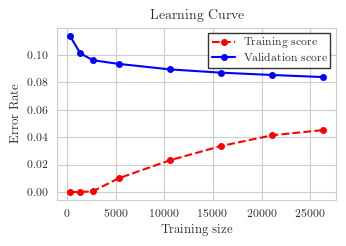

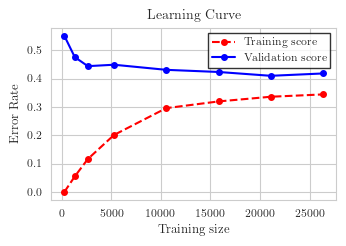

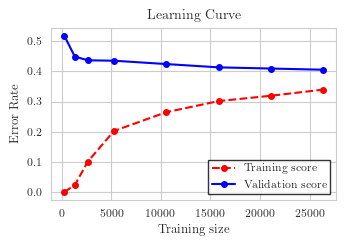

In [11]:
print('------boosting------')
summarize_model(input_dir, output_dir, 'boosting', name, 'Error Rate')

print('------boosting_feature_reduction------')
summarize_model(input_dir_feature_reduction, output_dir_feature_reduction, 'boosting', name, 'Error Rate')
print('------boosting_imb------')
summarize_model(input_dir_imb, output_dir_imb, 'boosting', name, 'Error Rate')

## Complexity curve

In [41]:
print('============ boosting =================')
cv_results = pd.read_csv(f'{input_dir}/boosting_cv_results.csv')
print(cv_results.loc[cv_results['mean_test_score'].idxmax()])
print('============ boosting_feature_reduction =================')
cv_results = pd.read_csv(f'{input_dir_feature_reduction}/boosting_cv_results.csv')
print(cv_results.loc[cv_results['mean_test_score'].idxmax()])
print('============ boosting_imb =================')
cv_results = pd.read_csv(f'{input_dir_imb}/boosting_cv_results.csv')
print(cv_results.loc[cv_results['mean_test_score'].idxmax()])


============ boosting =================
max_depth            7.000000
n_estimators        50.000000
subsample            0.900000
mean_fit_time       16.575677
std_fit_time         2.895671
mean_score_time      0.087258
std_score_time       0.080629
mean_test_score      0.595141
std_test_score       0.005465
mean_train_score     0.781326
std_train_score      0.003907
mean_train_error     0.218674
mean_test_error      0.404859
Name: 34, dtype: float64
============ boosting_feature_reduction =================
max_depth            5.000000
n_estimators        50.000000
subsample            1.000000
mean_fit_time        1.606508
std_fit_time         0.003976
mean_score_time      0.006269
std_score_time       0.000122
mean_test_score      0.582131
std_test_score       0.006101
mean_train_score     0.656008
std_train_score      0.002890
mean_train_error     0.343992
mean_test_error      0.417869
Name: 0, dtype: float64
============ boosting_imb =================
max_depth            5.000000

max_depth             5.000000
n_estimators        100.000000
subsample             0.900000
mean_fit_time         5.296144
std_fit_time          0.020944
mean_score_time       0.016694
std_score_time        0.002364
mean_test_score       0.593518
std_test_score        0.006208
mean_train_score      0.713127
std_train_score       0.003156
mean_train_error      0.286873
mean_test_error       0.406482
Name: 22, dtype: float64
Plot saved successfully at figures/dataset1/boosting_cc_n_estimators_bank_campaign.png
Plot saved successfully at figures/dataset1/boosting_training_time_n_estimators_bank_campaign.png
max_depth            7.000000
n_estimators        50.000000
subsample            0.900000
mean_fit_time       16.575677
std_fit_time         2.895671
mean_score_time      0.087258
std_score_time       0.080629
mean_test_score      0.595141
std_test_score       0.005465
mean_train_score     0.781326
std_train_score      0.003907
mean_train_error     0.218674
mean_test_error      0.4048

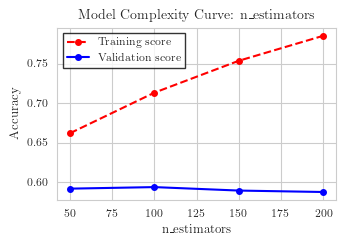

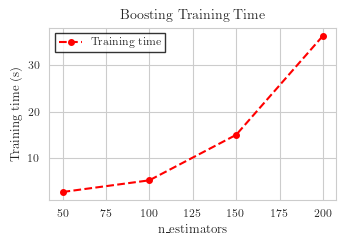

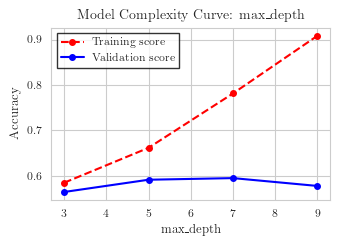

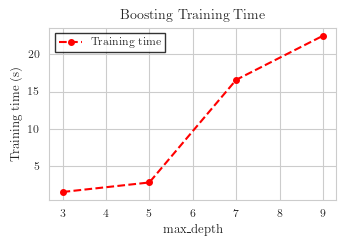

In [42]:
cv_results = pd.read_csv(os.path.join(input_dir, 'boosting_cv_results.csv'))
sub_cv_results = cv_results.loc[(cv_results['max_depth'] == 5) & (cv_results['subsample'] == 0.9)]
summarize_complexity_curve(sub_cv_results, output_dir, 'boosting', name, 'n_estimators', 'Accuracy')
plot, ax = plot_training_time(sub_cv_results, 'n_estimators', 'Boosting Training Time')
save_plot(plot, output_dir, 'boosting', 'training_time_n_estimators', name)

sub_cv_results = cv_results.loc[(cv_results['n_estimators'] == 50) & (cv_results['subsample'] == 0.9)]
summarize_complexity_curve(sub_cv_results, output_dir, 'boosting', name, 'max_depth', 'Accuracy')
plot, ax = plot_training_time(sub_cv_results, 'max_depth', 'Boosting Training Time')
save_plot(plot, output_dir, 'boosting', 'training_time_max_depth', name)
